In [14]:
import pandas as pd 

import os

def list_files(directory):
    tables = []
    with os.scandir(directory) as entries:
        for entry in entries:
            if entry.is_file():
                print(entry.name)
                tables.append(entry.name)
    return tables           


tables = list_files(directory="astarWindow/")


unique_postfixes = set()
for table in tables:
    part = table.split('-')
    unique_postfix = '-'.join(part[2:])
    if unique_postfix == '':
        print(table)
        continue
    unique_postfixes.add(unique_postfix)
    
print(len(tables))    
print(len(unique_postfixes))    
print(unique_postfixes)







astarGrid-krys-SS-1.0-RIGHT_BORDER_X-120.0.csv
astarGrid-krys-SS-1.0-RIGHT_BORDER_X-135.0.csv
astarGrid-krys-SS-1.0-RIGHT_BORDER_X-150.0.csv
astarGrid-krys-SS-1.0-RIGHT_BORDER_X-165.0.csv
astarGrid-krys-SS-1.0-RIGHT_BORDER_X-200.0.csv
astarGrid-krys-SS-1.0-RIGHT_BORDER_X-215.0.csv
astarGrid-krys-SS-1.0-RIGHT_BORDER_X-235.0.csv
astarGrid-krys-SS-1.0-RIGHT_BORDER_X-255.0.csv
astarGrid-krys-SS-1.0-RIGHT_BORDER_X-65.0.csv
astarGrid-krys-SS-1.0-RIGHT_BORDER_X-75.0.csv
astarGrid-krys-SS-1.0-RIGHT_BORDER_X-95.0.csv
astarGrid-krys-SS-10.0-RIGHT_BORDER_X-120.0.csv
astarGrid-krys-SS-10.0-RIGHT_BORDER_X-135.0.csv
astarGrid-krys-SS-10.0-RIGHT_BORDER_X-150.0.csv
astarGrid-krys-SS-10.0-RIGHT_BORDER_X-165.0.csv
astarGrid-krys-SS-10.0-RIGHT_BORDER_X-200.0.csv
astarGrid-krys-SS-10.0-RIGHT_BORDER_X-215.0.csv
astarGrid-krys-SS-10.0-RIGHT_BORDER_X-235.0.csv
astarGrid-krys-SS-10.0-RIGHT_BORDER_X-255.0.csv
astarGrid-krys-SS-10.0-RIGHT_BORDER_X-65.0.csv
astarGrid-krys-SS-10.0-RIGHT_BORDER_X-75.0.csv
astarGri

In [15]:
import glob 

#result_df = pd.DataFrame(columns=['TTFW', 'SS', 'win/rate'], dtype={'TTFW': float, 'SS': int, 'win/rate': float})
#result_df = pd.DataFrame(columns=['TTFW', 'SS', 'win/rate'])
#result_df['TTFW'] = result_df['TTFW'].astype(float)
#result_df['SS'] = result_df['SS'].astype(int)
#result_df['win/rate'] = result_df['win/rate'].astype(float)
result_df = pd.DataFrame(columns=['SS', 'RIGHT_BORDER_X', 'win/rate'])
result_df['SS'] = result_df['SS'].astype(float)
result_df['RIGHT_BORDER_X'] = result_df['RIGHT_BORDER_X'].astype(int)
result_df['win/rate'] = result_df['win/rate'].astype(float)


for unique_postfix in unique_postfixes:

    file_pattern = f"astarWindow/*{unique_postfix}"
    file_list = glob.glob(file_pattern)
    dfs = []

    # Loop through the list of files and read each CSV file into a DataFrame
    for file in file_list:
        df = pd.read_csv(file, skiprows=2)
        dfs.append(df)
    
    combined_df = pd.concat(dfs, ignore_index=True)
    ss = float(unique_postfix.split('-')[1])
    right_border_x = int(unique_postfix.split('-')[-1].split('.')[0])
    rate =  combined_df['win/fail'].sum()/combined_df.shape[0]
    print(ss, right_border_x, rate)
    new_df = pd.DataFrame({'SS': [ss], 'RIGHT_BORDER_X': [right_border_x], 'win/rate': [rate]})
    
    result_df = pd.concat([result_df, new_df], ignore_index=True)


30.0 255 0.9720930232558139
1.0 255 0.986046511627907
8.0 165 0.958139534883721
7.0 65 0.9906976744186047
9.0 215 0.9627906976744186
2.0 215 0.9953488372093023
4.0 65 0.986046511627907
9.0 65 0.9674418604651163
4.0 200 0.986046511627907
6.0 75 0.986046511627907
2.0 255 0.986046511627907
3.0 120 0.986046511627907
7.0 200 0.986046511627907
4.0 215 0.986046511627907
1.0 120 0.9906976744186047
9.0 135 0.9627906976744186
3.0 235 0.986046511627907
8.0 150 0.9720930232558139
8.0 215 0.9674418604651163
30.0 165 0.9674418604651163
5.0 95 0.9906976744186047
10.0 165 0.958139534883721
3.0 135 0.986046511627907
3.0 65 0.986046511627907
10.0 150 0.9674418604651163
3.0 75 0.986046511627907
2.0 75 0.986046511627907
8.0 65 0.9720930232558139
8.0 255 0.9674418604651163
9.0 200 0.9627906976744186
5.0 65 0.9906976744186047
2.0 150 0.9953488372093023
9.0 165 0.9720930232558139
6.0 235 0.9813953488372092
9.0 95 0.9674418604651163
7.0 95 0.9953488372093023
8.0 120 0.9674418604651163
6.0 215 0.98604651162790

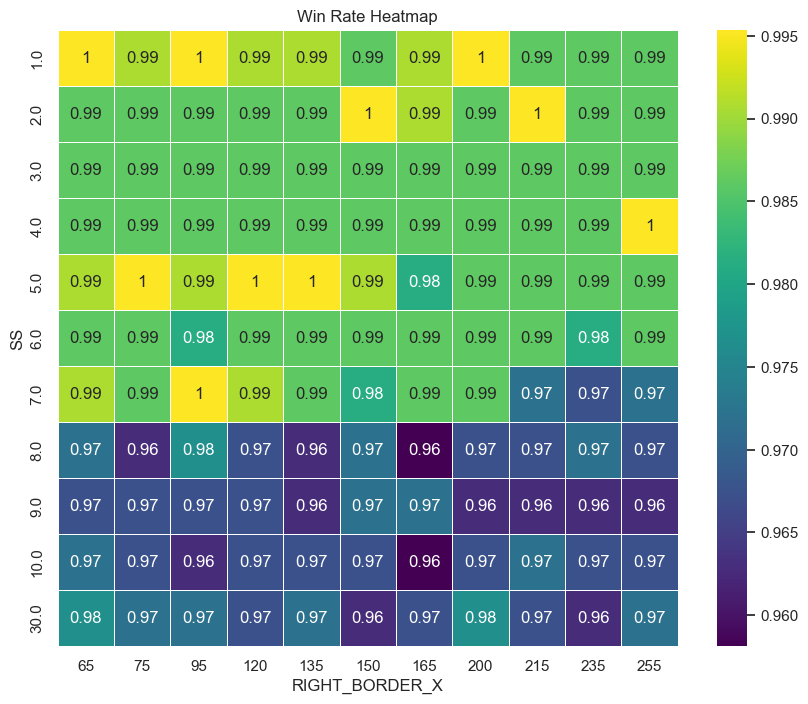

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt


heatmap_data = result_df.pivot(index='SS', columns='RIGHT_BORDER_X', values='win/rate')

# 
# # Create a heatmap using Seaborn
sns.set()
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', linewidths=.5)
plt.title('Win Rate Heatmap')
plt.show()
